In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import re

In [19]:
# SET STRAIN ID TO COMPARE
STRAIN = 'EC1'
STRAIN_ref_1 = 'SRR1179185'
STRAIN_ref_2 = 'Chominis1ng'
#Open VCF file
vcf = pd.read_csv("NEW_REF_filtered_snps.PASS_COV5.vcf",sep="\t", header=45)
vcf

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,C1_cat,...,SRR1179185,SRR5683558,SRR6813608,SRR7895268,SRR7895345,SRR793561,UKH101_cat,ukub17,uk18,uk196
0,CP044422,1004,.,G,A,570.26,PASS,AC=2;AF=0.200;AN=10;DP=129;ExcessHet=0.2482;FS...,GT:AD:DP:GQ:PGT:PID:PL,"./.:0,1:1:.:.:.:0,0,0",...,"./.:1,0:1:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","0/0:25,0:25:63:.:.:0,63,945","0/0:37,0:37:99:.:.:0,105,1575","./.:0,0:0:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0"
1,CP044422,1010,.,T,C,586.20,PASS,AC=2;AF=0.200;AN=10;DP=122;ExcessHet=0.2482;FS...,GT:AD:DP:GQ:PGT:PID:PL,"./.:0,0:0:.:.:.:0,0,0",...,"./.:0,1:1:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","0/0:21,0:21:3:.:.:0,3,45","0/0:35,0:35:3:.:.:0,3,45","./.:0,0:0:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0"
2,CP044422,1060,.,C,T,595.77,PASS,AC=2;AF=0.333;AN=6;DP=67;ExcessHet=0.4576;FS=0...,GT:AD:DP:GQ:PGT:PID:PL,"./.:0,0:0:.:.:.:0,0,0",...,"./.:0,4:4:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","./.:0,2:2:.:.:.:0,0,0","./.:0,5:5:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","./.:0,1:1:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0"
3,CP044422,1086,.,T,G,595.42,PASS,AC=2;AF=0.333;AN=6;DP=66;ExcessHet=0.4576;FS=0...,GT:AD:DP:GQ:PGT:PID:PL,"./.:0,0:0:.:.:.:0,0,0",...,"./.:0,0:0:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","./.:1,0:1:.:.:.:0,0,0","./.:3,0:3:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","./.:2,0:2:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0"
4,CP044422,1109,.,A,T,591.87,PASS,AC=4;AF=0.400;AN=10;DP=72;ExcessHet=0.1902;FS=...,GT:AD:DP:GQ:PGT:PID:PL,"./.:0,0:0:.:.:.:0,0,0",...,"0/0:3,1:4:0:.:.:0,0,85","./.:0,0:0:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","./.:1,0:1:.:.:.:0,0,0","./.:3,0:3:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878819,CP044415,1332490,.,G,A,3396.90,PASS,AC=8;AF=0.444;AN=18;DP=176;ExcessHet=0.0063;FS...,GT:AD:DP:GQ:PGT:PID:PL,"./.:0,0:0:.:.:.:0,0,0",...,"1/1:0,16:16:51:1|1:1332399_C_T:765,51,0","./.:0,14:14:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","./.:0,2:2:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","1/1:0,38:38:99:1|1:1332399_C_T:1710,114,0","./.:0,0:0:.:.:.:0,0,0","./.:1,0:1:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","0/0:2,0:2:6:.:.:0,6,49"
878820,CP044415,1332492,.,A,T,2415.94,PASS,AC=4;AF=0.182;AN=22;DP=177;ExcessHet=0.0680;FS...,GT:AD:DP:GQ:PGT:PID:PL,"./.:0,0:0:.:.:.:0,0,0",...,"1/1:0,16:16:48:1|1:1332399_C_T:720,48,0","0/0:11,3:14:0:.:.:0,0,337","./.:0,0:0:.:.:.:0,0,0","./.:0,2:2:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","1/1:0,34:34:99:1|1:1332399_C_T:1755,117,0","./.:0,0:0:.:.:.:0,0,0","./.:1,0:1:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","0/0:2,0:2:6:.:.:0,6,49"
878821,CP044415,1332500,.,A,C,2100.12,PASS,AC=4;AF=0.167;AN=24;DP=189;ExcessHet=0.0570;FS...,GT:AD:DP:GQ:PGT:PID:PL,"./.:0,0:0:.:.:.:0,0,0",...,"1/1:0,15:15:45:1|1:1332399_C_T:675,45,0","0/0:19,2:21:0:.:.:0,0,632","0/0:1,0:1:3:.:.:0,3,42","./.:0,2:2:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","1/1:0,33:33:99:1|1:1332399_C_T:1485,99,0","./.:0,0:0:.:.:.:0,0,0","./.:0,1:1:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","0/0:2,0:2:6:.:.:0,6,49"
878822,CP044415,1332529,.,T,A,2097.28,PASS,AC=4;AF=0.143;AN=28;DP=219;ExcessHet=0.0097;FS...,GT:AD:DP:GQ:PGT:PID:PL,"./.:0,1:1:.:.:.:0,0,0",...,"1/1:0,11:11:33:1|1:1332399_C_T:495,33,0","0/0:36,0:36:3:.:.:0,3,45","0/0:4,0:4:9:.:.:0,9,135","./.:0,2:2:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","1/1:0,36:36:99:1|1:1332399_C_T:1665,111,0","./.:0,0:0:.:.:.:0,0,0","./.:0,1:1:.:.:.:0,0,0","./.:0,0:0:.:.:.:0,0,0","0/0:2,0:2:6:.:.:0,6,49"


In [20]:
# Keep only genotype data, chrom ID and position

vcf = vcf.loc[:, ['#CHROM','POS',STRAIN,STRAIN_ref_1,STRAIN_ref_2]]
vcf[STRAIN] = vcf[STRAIN].replace(to_replace=':.*',value='',regex=True)
vcf[STRAIN_ref_1] = vcf[STRAIN_ref_1].replace(to_replace=':.*',value='',regex=True)
vcf[STRAIN_ref_2] = vcf[STRAIN_ref_2].replace(to_replace=':.*',value='',regex=True)
vcf

,#CHROM,POS,EC1,SRR1179185,Chominis1ng
0,CP044422,1004,./.,./.,./.
1,CP044422,1010,./.,./.,./.
2,CP044422,1060,./.,./.,./.
3,CP044422,1086,./.,./.,./.
4,CP044422,1109,./.,0/0,./.
...,...,...,...,...,...
878819,CP044415,1332490,./.,1/1,./.
878820,CP044415,1332492,./.,1/1,./.
878821,CP044415,1332500,./.,1/1,./.
878822,CP044415,1332529,./.,1/1,0/0


In [21]:
# Select one chromosome (CP044422)
vcf_CP044422 = vcf.loc[vcf['#CHROM']=='CP044422']
vcf_CP044422

,#CHROM,POS,EC1,SRR1179185,Chominis1ng
0,CP044422,1004,./.,./.,./.
1,CP044422,1010,./.,./.,./.
2,CP044422,1060,./.,./.,./.
3,CP044422,1086,./.,./.,./.
4,CP044422,1109,./.,0/0,./.
...,...,...,...,...,...
87516,CP044422,919601,./.,./.,./.
87517,CP044422,919618,./.,./.,./.
87518,CP044422,919661,./.,./.,./.
87519,CP044422,919677,./.,0/0,./.


CP044422


<ipython-input-29-e16e1c1db322>:41: RuntimeWarning: invalid value encountered in true_divide
  perc_cu = np.divide(list(counter.values() ), list(snp_counter.values()) ) * 100
<ipython-input-29-e16e1c1db322>:42: RuntimeWarning: invalid value encountered in true_divide
  perc_ch = np.divide(list(counter_2.values() ), list(snp_counter.values()) ) * 100
<ipython-input-29-e16e1c1db322>:43: RuntimeWarning: invalid value encountered in true_divide
  perc_cp = np.divide(list(ref_counter.values() ), list(snp_counter.values()) ) * 100


CP044421


<ipython-input-29-e16e1c1db322>:41: RuntimeWarning: invalid value encountered in true_divide
  perc_cu = np.divide(list(counter.values() ), list(snp_counter.values()) ) * 100
<ipython-input-29-e16e1c1db322>:42: RuntimeWarning: invalid value encountered in true_divide
  perc_ch = np.divide(list(counter_2.values() ), list(snp_counter.values()) ) * 100
<ipython-input-29-e16e1c1db322>:43: RuntimeWarning: invalid value encountered in true_divide
  perc_cp = np.divide(list(ref_counter.values() ), list(snp_counter.values()) ) * 100


CP044420


<ipython-input-29-e16e1c1db322>:41: RuntimeWarning: invalid value encountered in true_divide
  perc_cu = np.divide(list(counter.values() ), list(snp_counter.values()) ) * 100
<ipython-input-29-e16e1c1db322>:42: RuntimeWarning: invalid value encountered in true_divide
  perc_ch = np.divide(list(counter_2.values() ), list(snp_counter.values()) ) * 100
<ipython-input-29-e16e1c1db322>:43: RuntimeWarning: invalid value encountered in true_divide
  perc_cp = np.divide(list(ref_counter.values() ), list(snp_counter.values()) ) * 100


CP044419


<ipython-input-29-e16e1c1db322>:41: RuntimeWarning: invalid value encountered in true_divide
  perc_cu = np.divide(list(counter.values() ), list(snp_counter.values()) ) * 100
<ipython-input-29-e16e1c1db322>:42: RuntimeWarning: invalid value encountered in true_divide
  perc_ch = np.divide(list(counter_2.values() ), list(snp_counter.values()) ) * 100
<ipython-input-29-e16e1c1db322>:43: RuntimeWarning: invalid value encountered in true_divide
  perc_cp = np.divide(list(ref_counter.values() ), list(snp_counter.values()) ) * 100


CP044418


<ipython-input-29-e16e1c1db322>:41: RuntimeWarning: invalid value encountered in true_divide
  perc_cu = np.divide(list(counter.values() ), list(snp_counter.values()) ) * 100
<ipython-input-29-e16e1c1db322>:42: RuntimeWarning: invalid value encountered in true_divide
  perc_ch = np.divide(list(counter_2.values() ), list(snp_counter.values()) ) * 100
<ipython-input-29-e16e1c1db322>:43: RuntimeWarning: invalid value encountered in true_divide
  perc_cp = np.divide(list(ref_counter.values() ), list(snp_counter.values()) ) * 100


CP044417


<ipython-input-29-e16e1c1db322>:41: RuntimeWarning: invalid value encountered in true_divide
  perc_cu = np.divide(list(counter.values() ), list(snp_counter.values()) ) * 100
<ipython-input-29-e16e1c1db322>:42: RuntimeWarning: invalid value encountered in true_divide
  perc_ch = np.divide(list(counter_2.values() ), list(snp_counter.values()) ) * 100
<ipython-input-29-e16e1c1db322>:43: RuntimeWarning: invalid value encountered in true_divide
  perc_cp = np.divide(list(ref_counter.values() ), list(snp_counter.values()) ) * 100


CP044416


<ipython-input-29-e16e1c1db322>:41: RuntimeWarning: invalid value encountered in true_divide
  perc_cu = np.divide(list(counter.values() ), list(snp_counter.values()) ) * 100
<ipython-input-29-e16e1c1db322>:42: RuntimeWarning: invalid value encountered in true_divide
  perc_ch = np.divide(list(counter_2.values() ), list(snp_counter.values()) ) * 100
<ipython-input-29-e16e1c1db322>:43: RuntimeWarning: invalid value encountered in true_divide
  perc_cp = np.divide(list(ref_counter.values() ), list(snp_counter.values()) ) * 100


CP044415


<ipython-input-29-e16e1c1db322>:41: RuntimeWarning: invalid value encountered in true_divide
  perc_cu = np.divide(list(counter.values() ), list(snp_counter.values()) ) * 100
<ipython-input-29-e16e1c1db322>:42: RuntimeWarning: invalid value encountered in true_divide
  perc_ch = np.divide(list(counter_2.values() ), list(snp_counter.values()) ) * 100
<ipython-input-29-e16e1c1db322>:43: RuntimeWarning: invalid value encountered in true_divide
  perc_cp = np.divide(list(ref_counter.values() ), list(snp_counter.values()) ) * 100


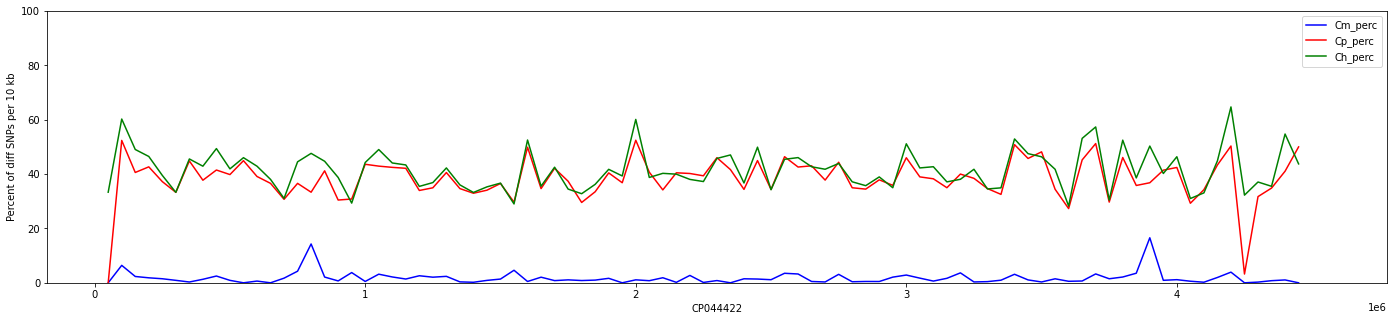

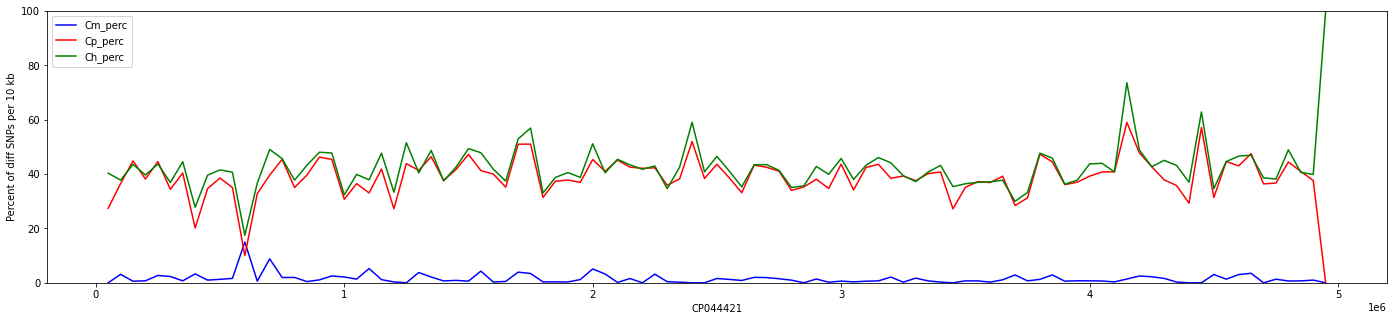

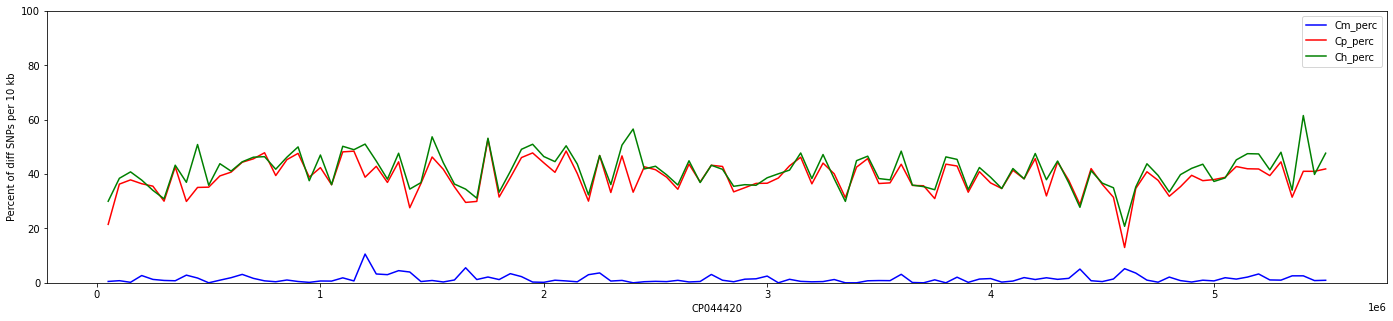

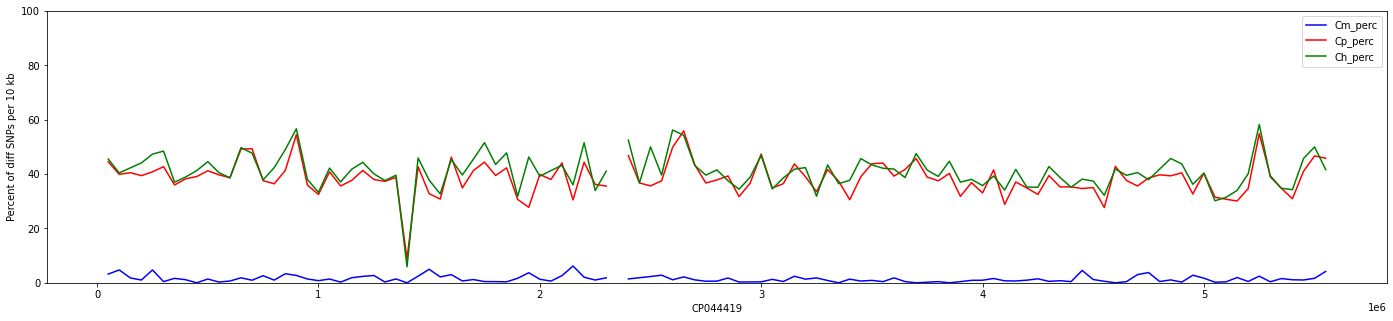

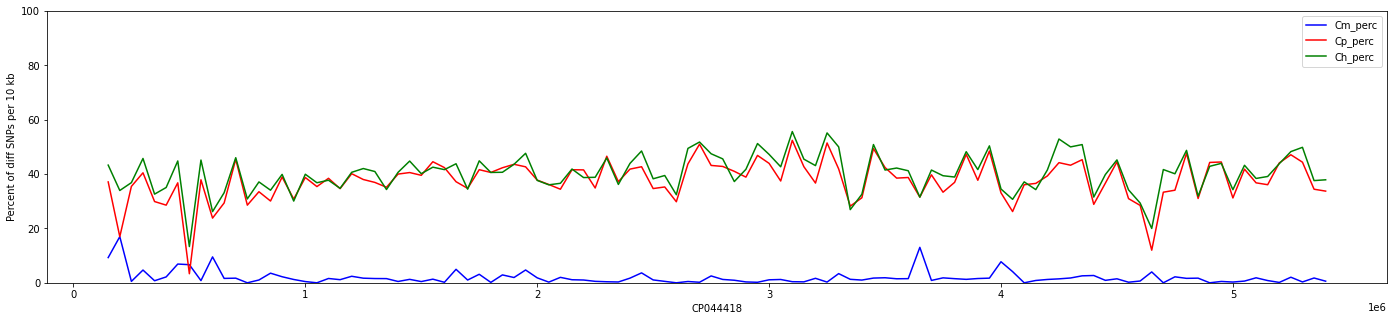

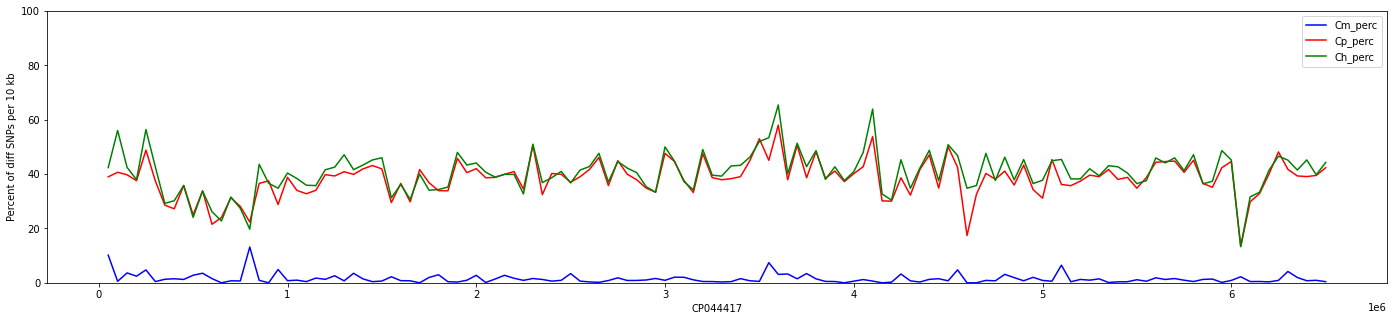

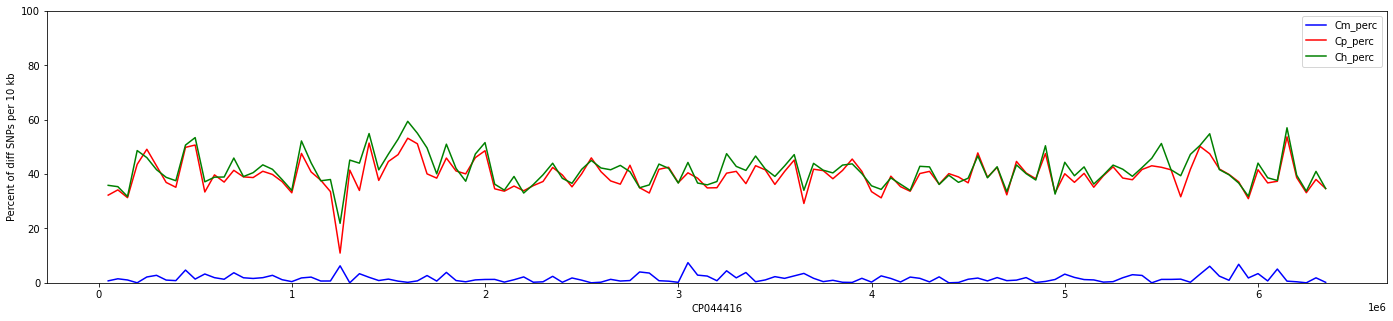

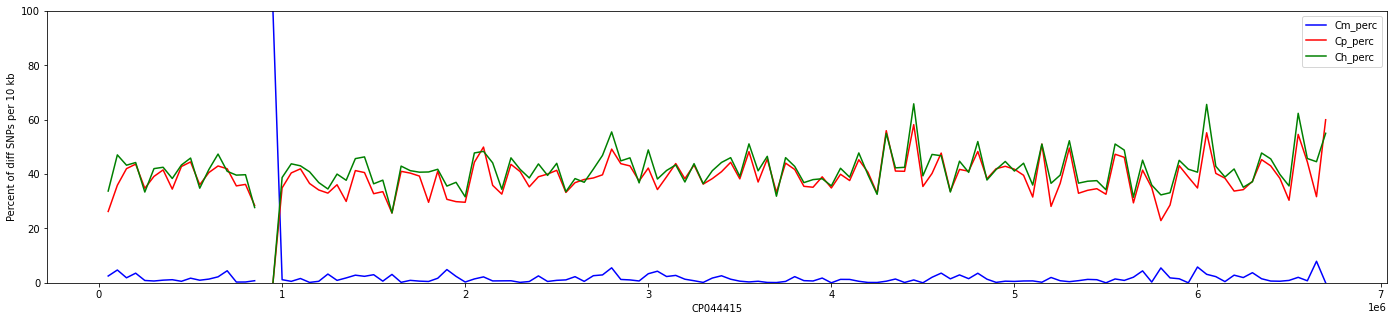

In [29]:
# Iterate through chromosomes
bin_size = 10000

for chr in vcf["#CHROM"].unique():
    print(chr)
    chr_vcf = vcf.loc[vcf['#CHROM']==chr]
    
    counter = dict()
    counter_2 =  dict()
    ref_counter = dict()
    gap_counter = dict()
    snp_counter = dict()

    for i in chr_vcf.index:
        x = int( chr_vcf.loc[i,'POS']/ bin_size)
        bin_idx = ((x) + 1) * 5
        counter[bin_idx] = counter.get(bin_idx,0)
        counter_2[bin_idx] = counter_2.get(bin_idx,0)
        ref_counter[bin_idx] = ref_counter.get(bin_idx,0)
        gap_counter[bin_idx] = gap_counter.get(bin_idx,0)
        snp_counter[bin_idx] = snp_counter.get(bin_idx,0)

        if chr_vcf[STRAIN].loc[i] == './.' or chr_vcf[STRAIN_ref_1].loc[i] == './.' or chr_vcf[STRAIN_ref_2].loc[i] == './.':
            gap_counter[bin_idx] = gap_counter[bin_idx] + 1
            continue
        else:
            snp_counter[bin_idx] = snp_counter[bin_idx] + 1 
        
        if chr_vcf[STRAIN].loc[i] != chr_vcf[STRAIN_ref_1].loc[i]:
            #print('same', counter[bin_idx])
            counter[bin_idx] = counter[bin_idx] + 1 
        
        if chr_vcf[STRAIN].loc[i] != chr_vcf[STRAIN_ref_2].loc[i]:
            #print('same', counter[bin_idx])
            counter_2[bin_idx] = counter_2[bin_idx] + 1 

        if chr_vcf[STRAIN].loc[i] != '0/0':
            #print('same', counter[bin_idx])
            ref_counter[bin_idx] = ref_counter[bin_idx] + 1 

    perc_cu = np.divide(list(counter.values() ), list(snp_counter.values()) ) * 100
    perc_ch = np.divide(list(counter_2.values() ), list(snp_counter.values()) ) * 100
    perc_cp = np.divide(list(ref_counter.values() ), list(snp_counter.values()) ) * 100

    #x = np.multiply(list(counter.keys()),bin_size)

    tmp_df = pd.DataFrame({'chr':chr, 
                            'bins':np.multiply(list(counter.keys()),bin_size),
                            STRAIN_ref_1:counter.values(), 
                            'Cparvum':ref_counter.values(),
                            STRAIN_ref_2:counter_2.values(), 
                            'gaps':gap_counter.values(),
                            'Cm_perc': perc_cu,
                            'Cp_perc': perc_cp,
                            'Ch_perc': perc_ch
                            })

    # Make plot
    fig, ax = plt.subplots(figsize=(24, 5))
    tmp_df.plot(
        x="bins",
        y="Cm_perc",
        kind="line",
        color="blue",
        ax=ax,
        alpha=1,
    )
    tmp_df.plot(
        x="bins",
        y="Cp_perc",
        kind="line",
        color="red",
        style="-",
        ax=ax,
        alpha=1,
    )
    tmp_df.plot(
        x="bins",
        y="Ch_perc",
        kind="line",
        color="green",
        style="-",
        ax=ax,
        alpha=1,
    )
    ax.set_xlabel(chr)
    ax.set_ylabel('Percent of diff SNPs per 10 kb')
    ax.set_ylim(0,100)

    plt.savefig(f"{STRAIN}_{chr}.haplotypes.pdf")





